In [5]:
import numpy as np
import matplotlib.pylab as plot
from astropy.io import ascii,fits
from scipy import interpolate
import grb_catalogs
from BurstCube.LocSim.Detector import *
from BurstCube.LocSim.Spacecraft import *
from astropy.coordinates import SkyCoord
from astropy import units as u
from scipy.optimize import curve_fit
from astropy.table import Table
import healpy as hp
from pylab import cm
import matplotlib.colors as mpl_col

In [6]:
biadir='/Users/jracusin/Bia/'

In [23]:
def plot_exposures(pointings,Aeff_fact):
    npointings=len(pointings)
    sc = Spacecraft(pointings,lat='00:00:00',lon='260:00:00')
    NSIDE = 32
    exposure_positions_hp = np.arange(hp.nside2npix(NSIDE))
    exposure_positions_pix = hp.pix2ang(NSIDE, exposure_positions_hp, lonlat=True)
    exposure_positions = np.vstack(exposure_positions_pix)
    exposures = np.array([[ detector.exposure(position[0],position[1], alt=-90.,index=1) for position in exposure_positions.T] 
                          for detector in sc.detectors])

    plot.figure(figsize=(20,npointings))
    s=np.argsort(pointings.keys())
    for j in range(npointings):
        i=s[j]
        hp.mollview(exposures[i]/max(exposures[i])*Aeff_fact,title='Detector '+pointings.keys()[i],\
                    sub = [np.round(npointings/3.+0.5),3,int(str(j+1))])
    exps=exposures.sum(axis=0)*Aeff_fact
    #bia_fs=(exps-min(exps))/max(exps)
    fs=exps#-min(gbm_exps))/max(gbm_exps)
    vec=hp.ang2vec(180,0,lonlat=True)
    i=hp.query_disc(NSIDE,vec,67*np.pi/180.)
    fs[i]=0
    hp.mollview(fs,title='Sum of All Bia Detectors')
#    plot.savefig(biadir+'exposure_maps_'+str(ang)+'.png')
    return sc,fs,exposure_positions,pointings

In [24]:
def num_detectors(sc,exposure_positions,pointings):

    npointings=len(pointings)
    ## evaluate detector overlap
    exposures = np.array([[ detector.exposure(position[0],position[1], alt=-23.,fov=60.,index=0) for position in exposure_positions.T] 
                          for detector in sc.detectors])

    plot.figure(figsize=(20,npointings))
    s=np.argsort(pointings.keys())
    for j in range(npointings):
        i=s[j]
        hp.mollview(exposures[i],title='Detector '+pointings.keys()[i],\
                    sub = [np.round(npointings/3.+0.5),3,int(str(j+1))])
    exps=exposures.sum(axis=0)
    #bia_fs=(exps-min(exps))/max(exps)
    fs_det=exps#-min(gbm_exps))/max(gbm_exps)

    vmin_skewed = -1.0
    vmid_skewed =  3.0
    vmax_skewed = np.max(exps)
    vstep = 1.0
    levels = np.arange(vmin_skewed, vmax_skewed+vstep, vstep)
    cmap = cm.get_cmap('bwr', len(levels)-1)
    deltamax = max(vmax_skewed-vmid_skewed, vmid_skewed-vmin_skewed)

    vfull = [ vmid_skewed-deltamax, vmid_skewed+deltamax]  # Full range either side of vmid
    #levfull = np.arange( vfull[0], vfull[1], vstep ) # Levels over full value range

    ncols = len(levels) -1 # number of colours we actually want to use

    vlo_frac = (vmin_skewed-vfull[0]) / (2.0*deltamax) # 0 or greater
    vhi_frac = (vmax_skewed-vfull[0]) / (2.0*deltamax) # 1 or less
    cmap_base = cm.get_cmap('bwr') # maps the range 0-1 to colours
    cols = cmap_base( np.linspace( vlo_frac, vhi_frac, ncols) )
    cmap_skewed = mpl_col.LinearSegmentedColormap.from_list('skewed',cols, N=ncols)
    cmap_skewed.set_bad('gray')
    cmap_skewed.set_under('w')

    hp.mollview(fs_det,title='Overlap of Bia Detectors',cmap=cmap_skewed)

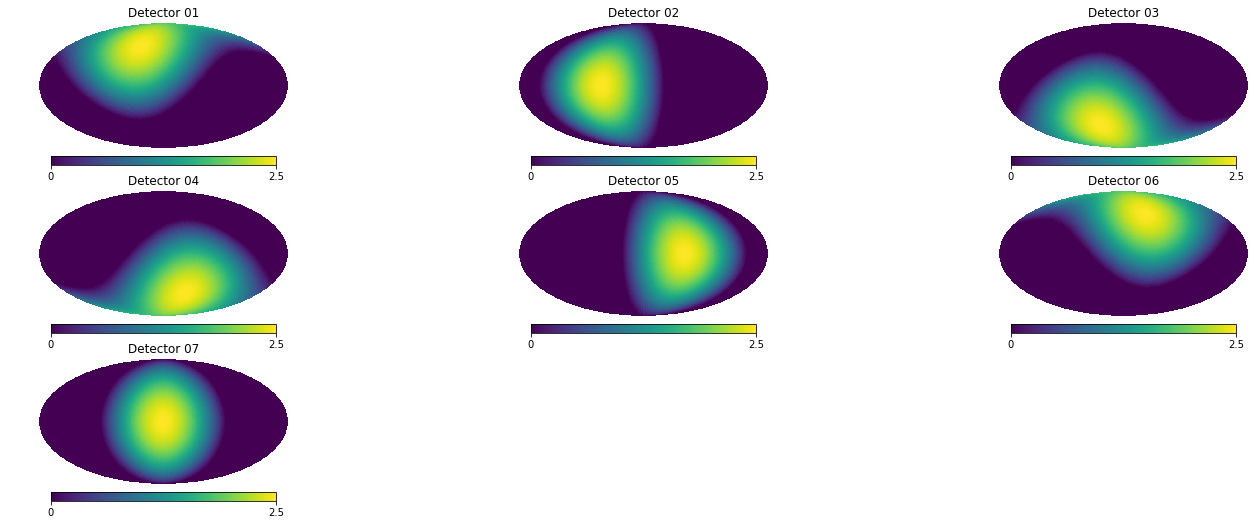

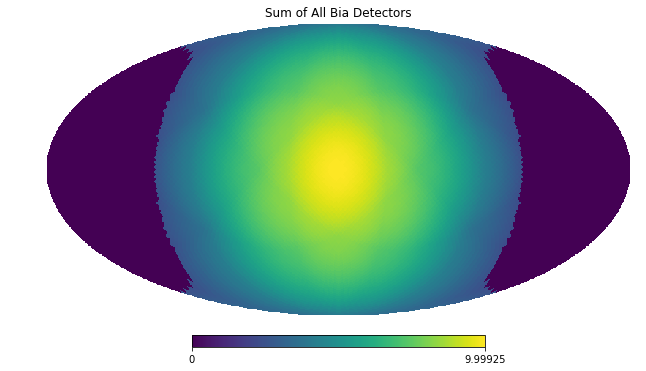

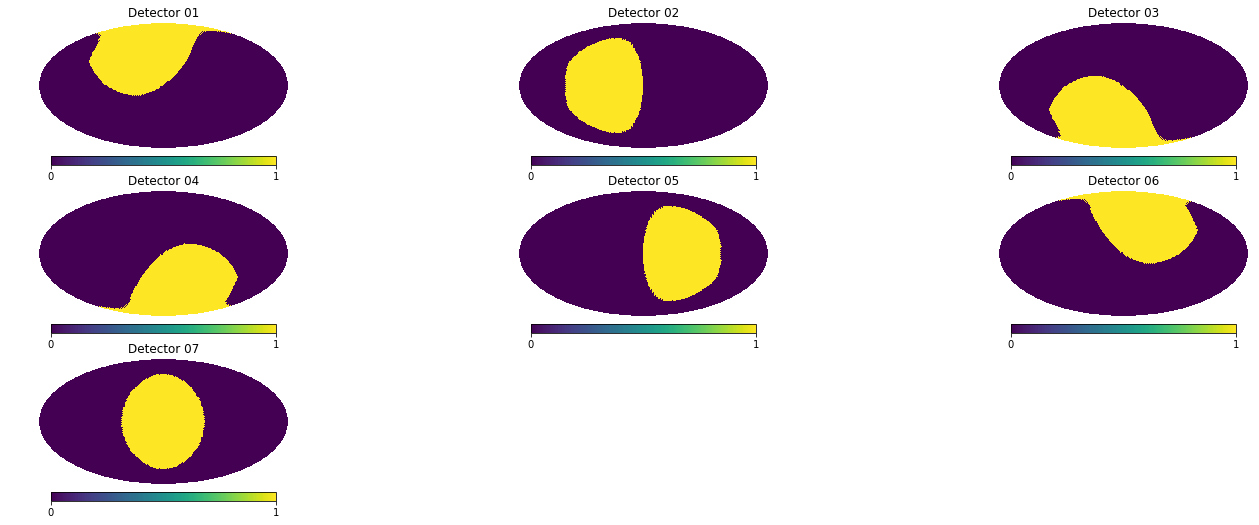

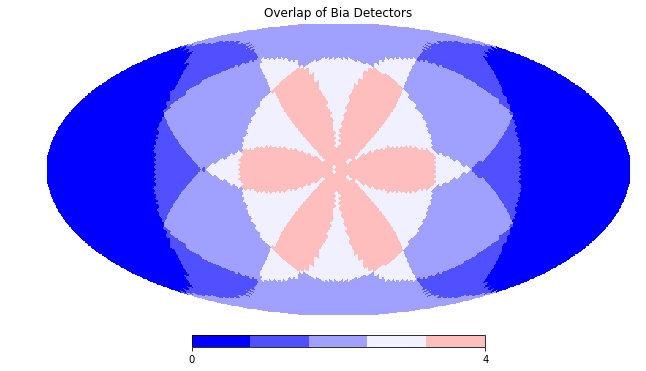

In [25]:
## 7 super detectors
ang=60
bia_pointings = {'01': ('30:0:0',str(ang)+':0:0'),
                 '02': ('90:0:0',str(ang)+':0:0'),
                 '03': ('150:0:0',str(ang)+':0:0'),
                 '04': ('210:0:0',str(ang)+':0:0'),
                 '05': ('270:0:0',str(ang)+':0:0'),
                 '06': ('330:0:0',str(ang)+':0:0'),
                 '07': ('0:0:0','0:0:0')}
Aeff_fact=2.5
sc,fs,exposure_positions,pointings=plot_exposures(bia_pointings,Aeff_fact) 
num_detectors(sc,exposure_positions,pointings)

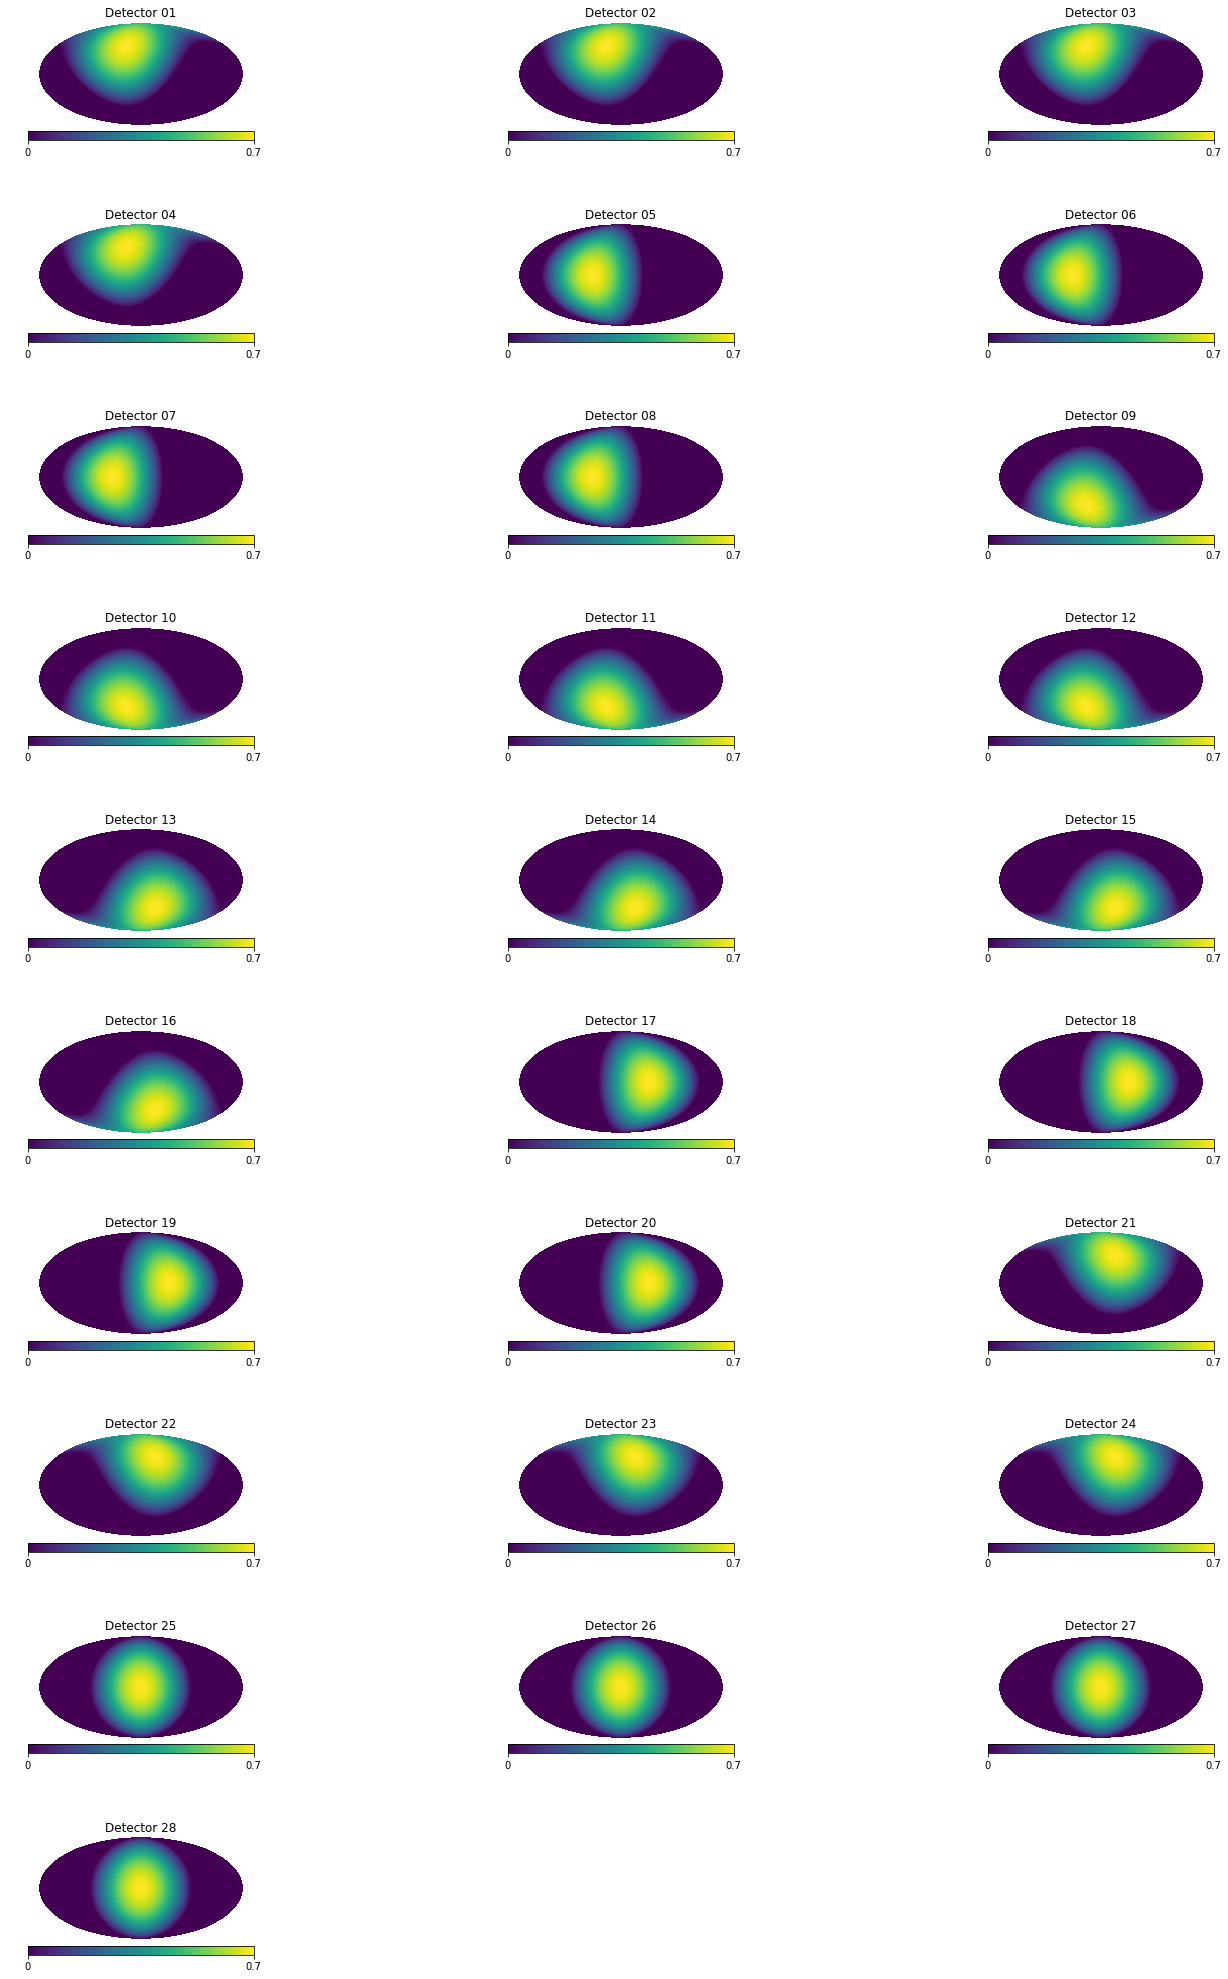

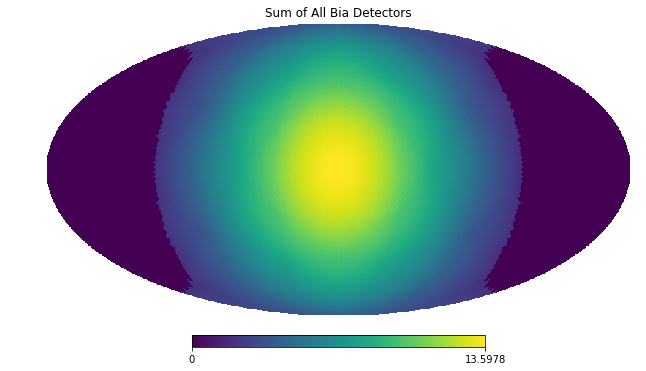

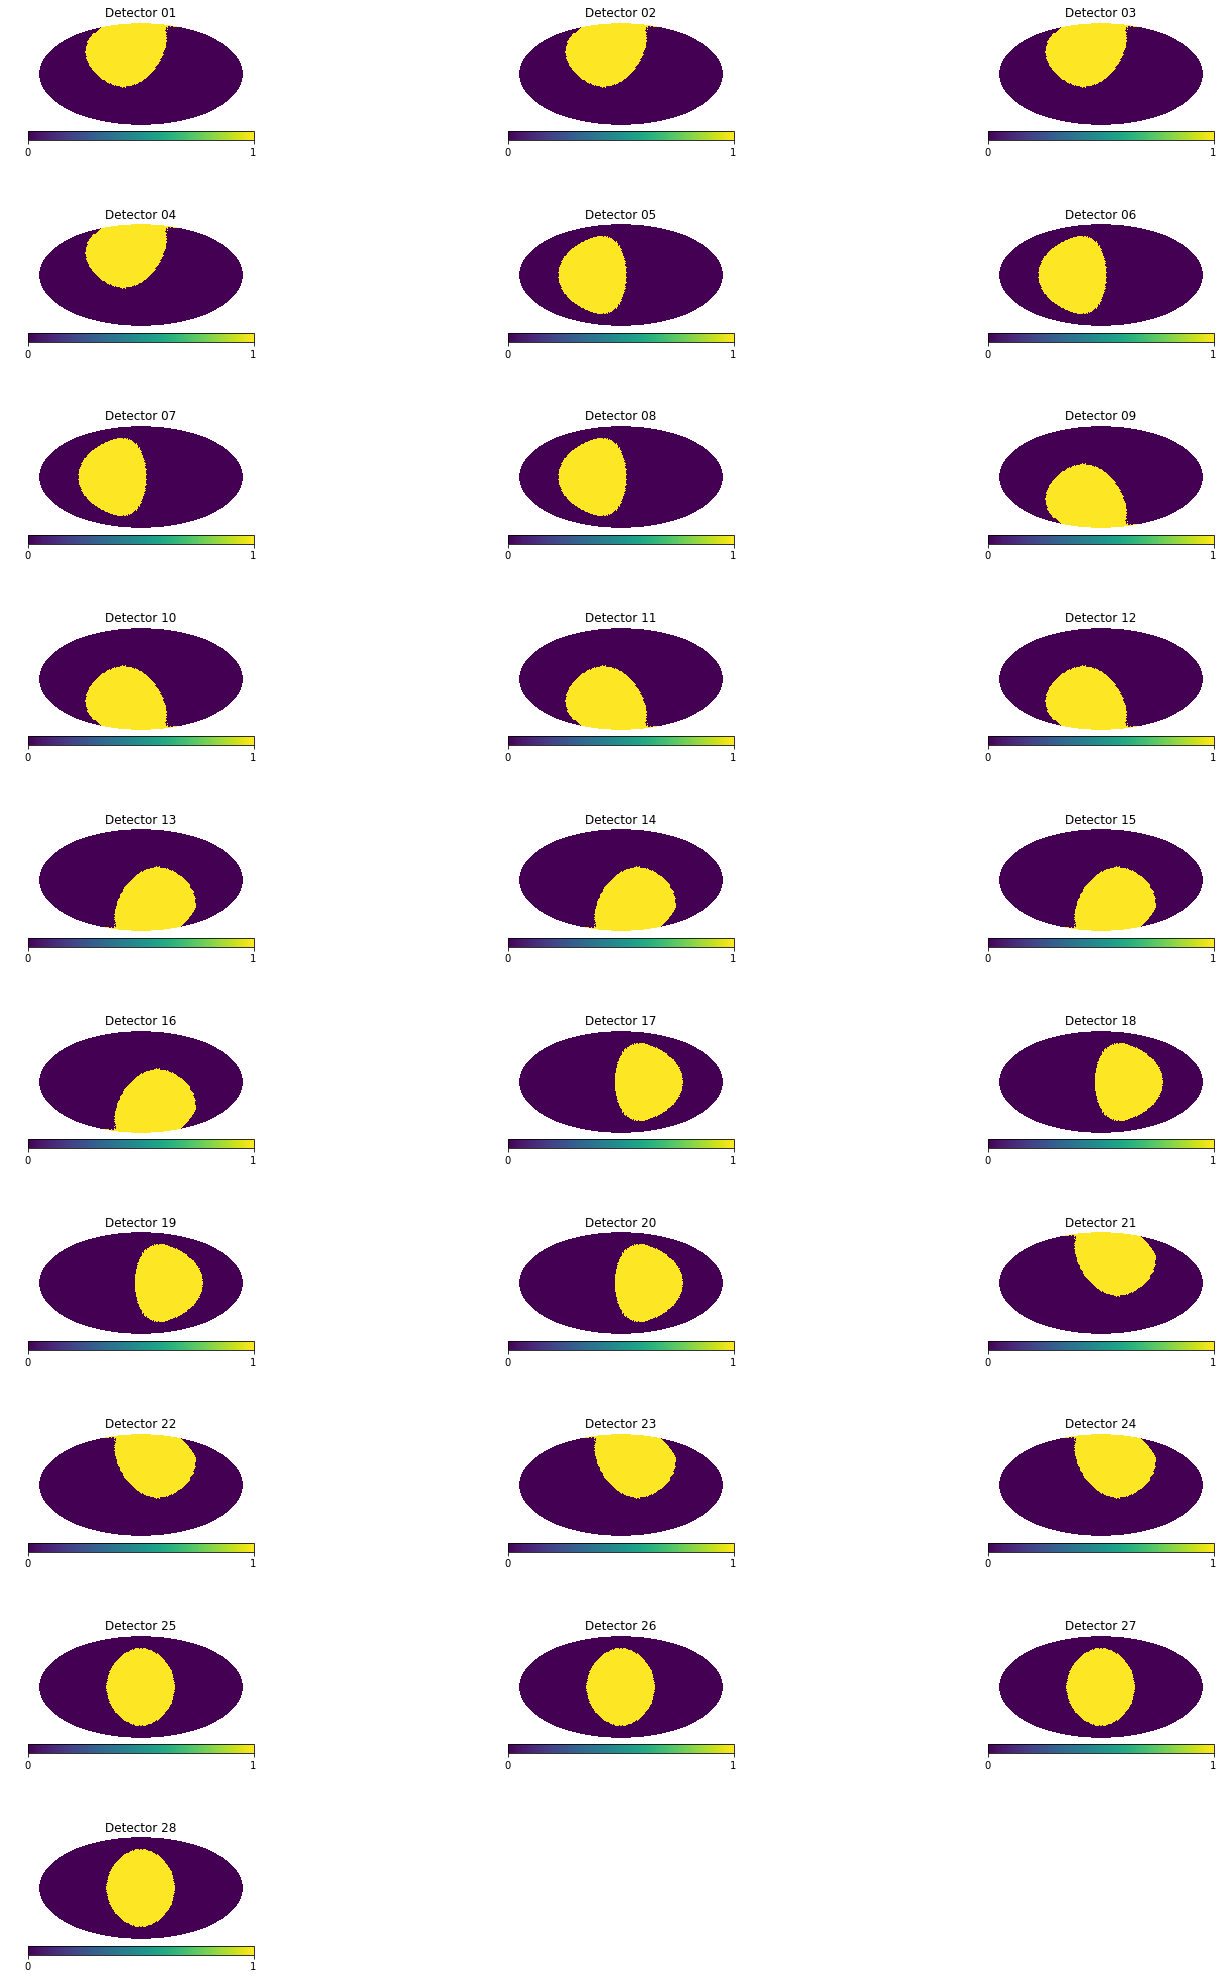

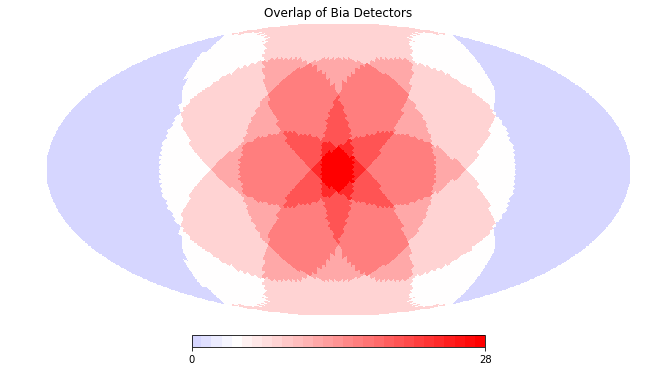

In [27]:
## 28 BC detectors with 7 clusters of 4 copointed
ang=50
bia_pointings = {'01': ('30:0:0',str(ang)+':0:0'),
                '02': ('30:0:0',str(ang)+':0:0'),
                '03': ('30:0:0',str(ang)+':0:0'),
                '04': ('30:0:0',str(ang)+':0:0'),
                '05': ('90:0:0',str(ang)+':0:0'),
                '06': ('90:0:0',str(ang)+':0:0'),
                '07': ('90:0:0',str(ang)+':0:0'),
                '08': ('90:0:0',str(ang)+':0:0'),
                '09': ('150:0:0',str(ang)+':0:0'),
                '10': ('150:0:0',str(ang)+':0:0'),
                '11': ('150:0:0',str(ang)+':0:0'),
                '12': ('150:0:0',str(ang)+':0:0'),
                '13': ('210:0:0',str(ang)+':0:0'),
                '14': ('210:0:0',str(ang)+':0:0'),
                '15': ('210:0:0',str(ang)+':0:0'),
                '16': ('210:0:0',str(ang)+':0:0'),
                '17': ('270:0:0',str(ang)+':0:0'),
                '18': ('270:0:0',str(ang)+':0:0'),
                '19': ('270:0:0',str(ang)+':0:0'),
                '20': ('270:0:0',str(ang)+':0:0'),
                '21': ('330:0:0',str(ang)+':0:0'),
                '22': ('330:0:0',str(ang)+':0:0'),
                '23': ('330:0:0',str(ang)+':0:0'),
                '24': ('330:0:0',str(ang)+':0:0'),
                '25': ('0:0:0','0:0:0'),
                '26': ('0:0:0','0:0:0'),
                '27': ('0:0:0','0:0:0'),
                '28': ('0:0:0','0:0:0')}
Aeff_fact=0.7

sc,fs,exposure_positions,pointings=plot_exposures(bia_pointings,Aeff_fact) 
num_detectors(sc,exposure_positions,pointings)

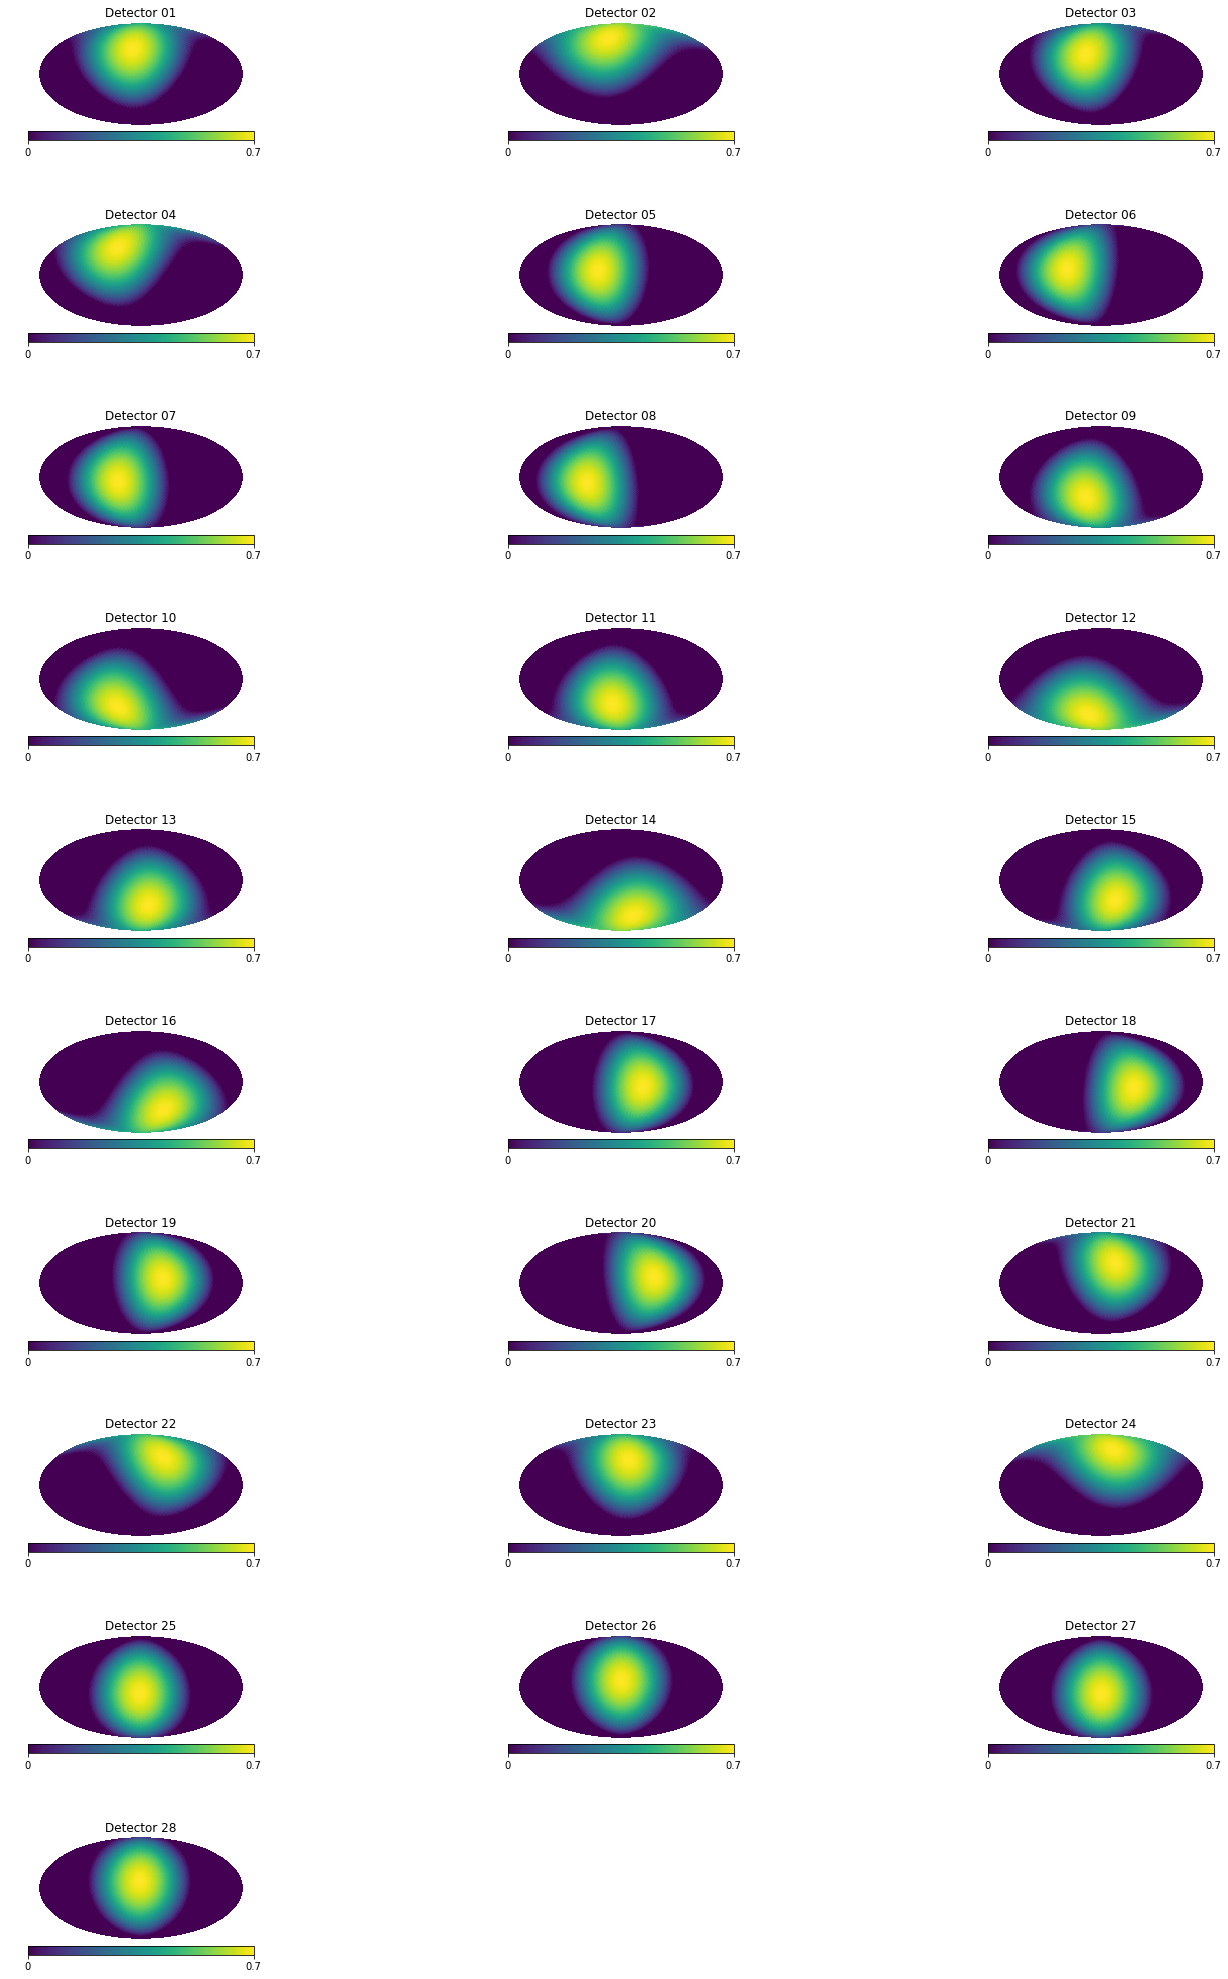

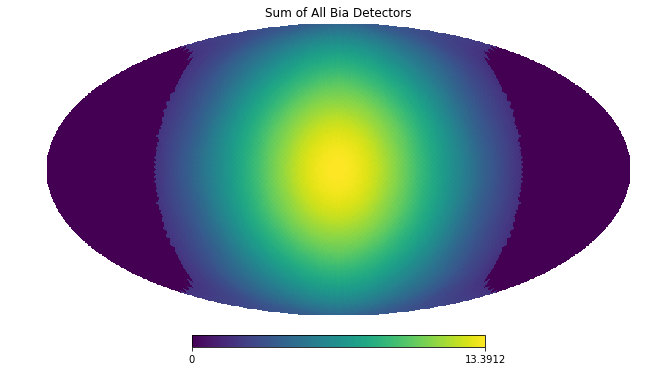

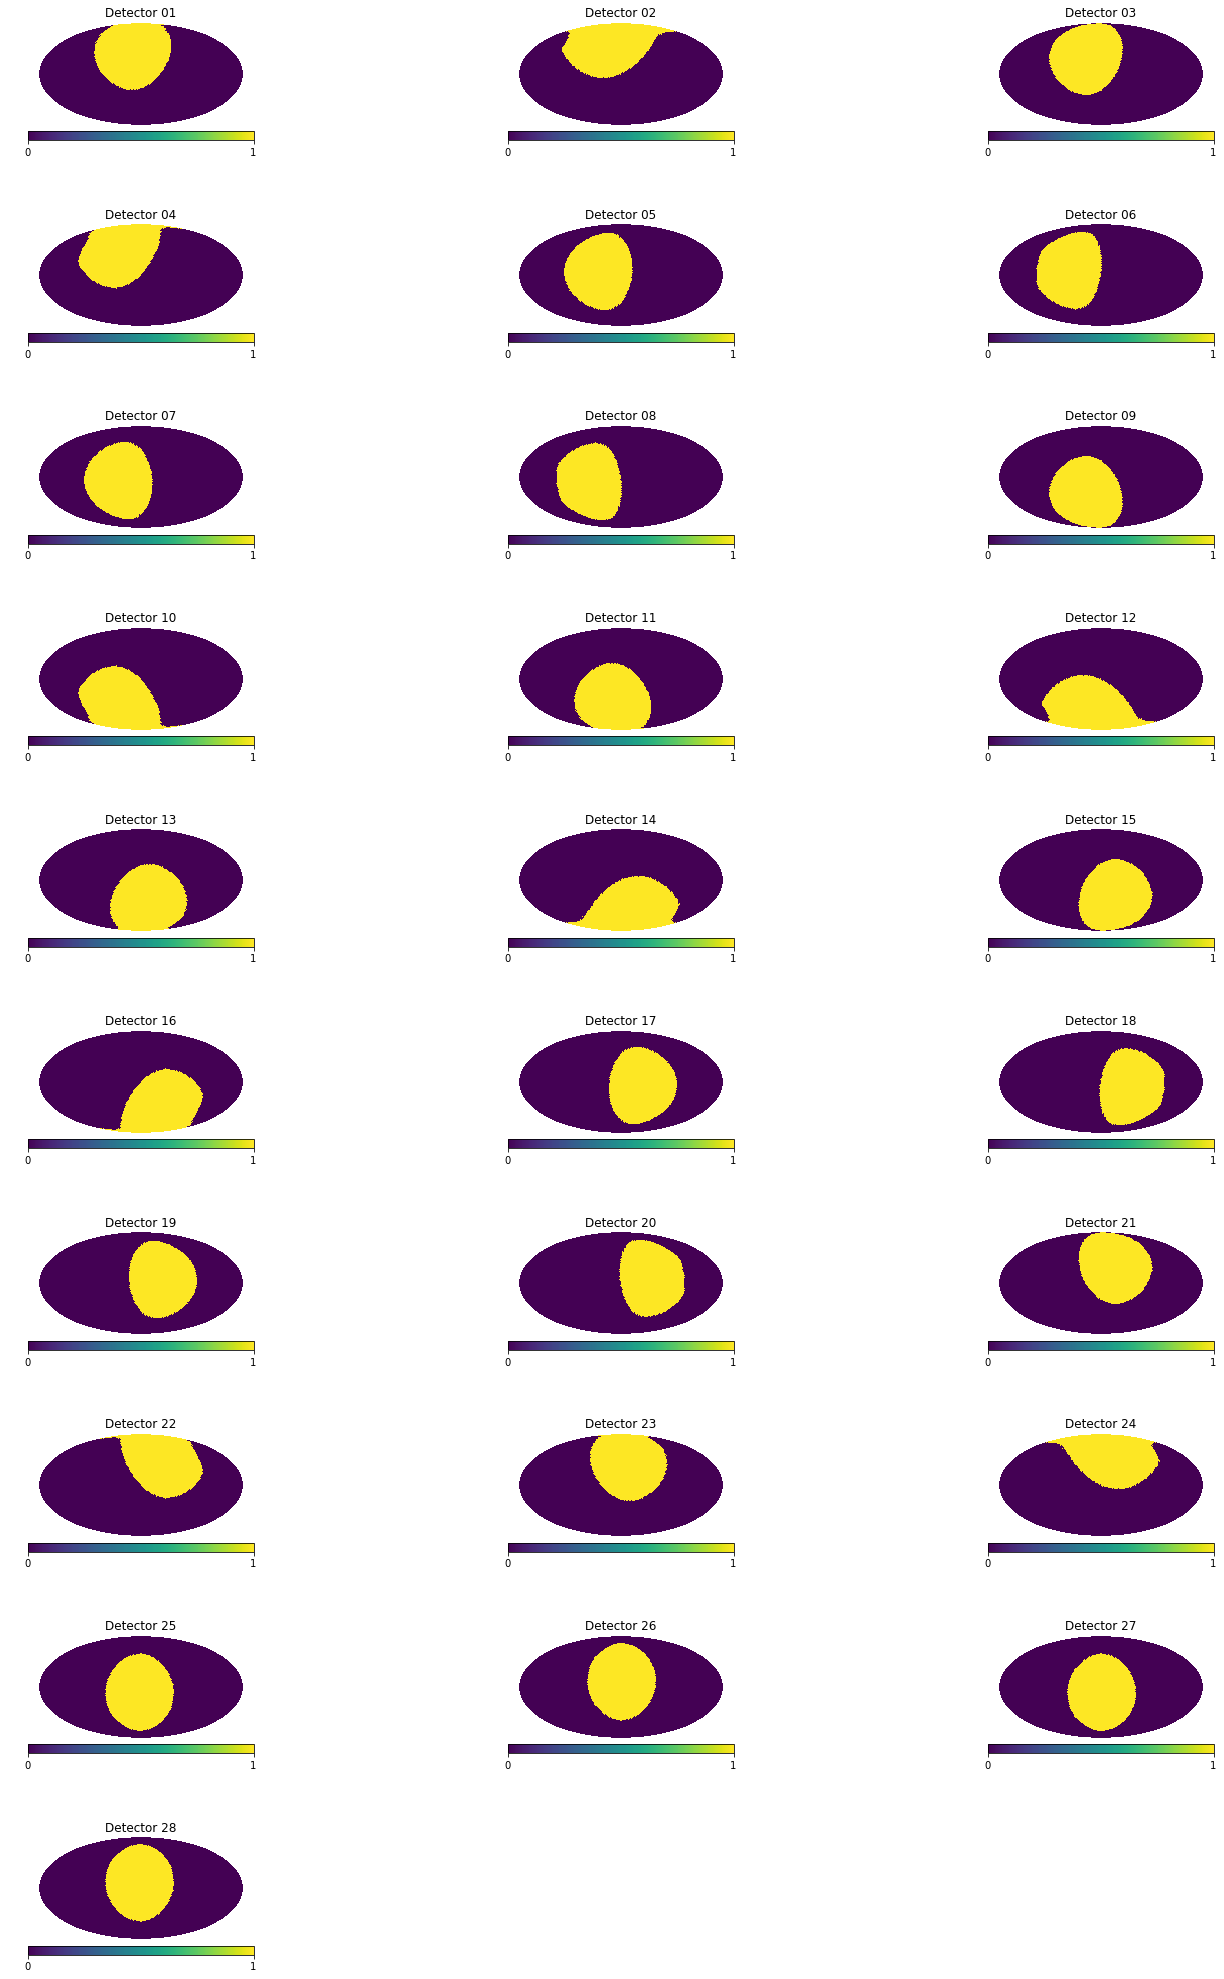

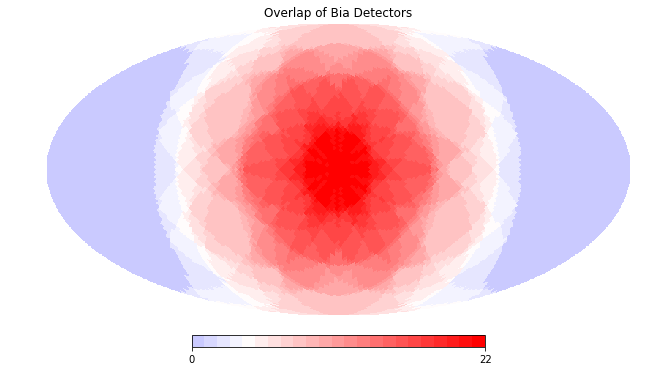

In [28]:
## 28 BC detectors with 7 clusters of 4 offset by 10 deg in each direction
ang=50.
off=10.
bia_pointings = {'01': (str(30-off)+':0:0',str(ang-off)+':0:0'),
                '02': (str(30-off)+':0:0',str(ang+off)+':0:0'),
                '03': (str(30+off)+':0:0',str(ang-off)+':0:0'),
                '04': (str(30+off)+':0:0',str(ang+off)+':0:0'),
                '05': (str(90-off)+':0:0',str(ang-off)+':0:0'),
                '06': (str(90-off)+':0:0',str(ang+off)+':0:0'),
                '07': (str(90+off)+':0:0',str(ang-off)+':0:0'),
                '08': (str(90+off)+':0:0',str(ang+off)+':0:0'),
                '09': (str(150-off)+':0:0',str(ang-off)+':0:0'),
                '10': (str(150-off)+':0:0',str(ang+off)+':0:0'),
                '11': (str(150+off)+':0:0',str(ang-off)+':0:0'),
                '12': (str(150+off)+':0:0',str(ang+off)+':0:0'),
                '13': (str(210-off)+':0:0',str(ang-off)+':0:0'),
                '14': (str(210-off)+':0:0',str(ang+off)+':0:0'),
                '15': (str(210+off)+':0:0',str(ang-off)+':0:0'),
                '16': (str(210+off)+':0:0',str(ang+off)+':0:0'),
                '17': (str(270-off)+':0:0',str(ang-off)+':0:0'),
                '18': (str(270-off)+':0:0',str(ang+off)+':0:0'),
                '19': (str(270+off)+':0:0',str(ang-off)+':0:0'),
                '20': (str(270+off)+':0:0',str(ang+off)+':0:0'),
                '21': (str(330-off)+':0:0',str(ang-off)+':0:0'),
                '22': (str(330-off)+':0:0',str(ang+off)+':0:0'),
                '23': (str(330+off)+':0:0',str(ang-off)+':0:0'),
                '24': (str(330+off)+':0:0',str(ang+off)+':0:0'),
                '25': (str(0-off)+':0:0',str(0-off)+':0:0'),
                '26': (str(0-off)+':0:0',str(0+off)+':0:0'),
                '27': (str(0+off)+':0:0',str(0-off)+':0:0'),
                '28': (str(0+off)+':0:0',str(0+off)+':0:0')}
                 
Aeff_fact=0.7

sc,fs,exposure_positions,pointings=plot_exposures(bia_pointings,Aeff_fact) 
num_detectors(sc,exposure_positions,pointings)